# Electricity Market & Sector Coupling Project

### Calculation of the Levelized Cost of Hydrogen Production from Natural Gas Steam Methane Reformer and Water Elecrolyser - Germany

In [146]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### LCOHs and CO2 Emission Calculation

In [149]:
def calculate_lcoh_SMR(q_H2, FLH, r, t, P_NG, Eff_SMR, SIC_SMR, P_CO2):
    """Calculates the Levelized Cost of Hydrogen (LCOH) for Steam Methane Reforming (SMR).

    Args:
        q_H2: Amount of Hydrogen Required by 2030, kWh
        FLH: Full Load Hours, hr
        r: Discount Rate
        t: Lifetime, yr
        P_NG: Natural Gas Price, €/kWh
        Eff_SMR: Efficiency of SMR
        SIC_SMR: Specific Investment Cost of SMR, €/kW
        P_CO2: CO2 Tax, €/kgCO2

    Returns:
        LCOH_SMR: Levelized Cost of Hydrogen from SMR, €/kWh
    """

    CRF = (r*(1+r)**t)/(((1+r)**t)-1)  # Capital Recovery Factor

    IC = q_H2/FLH  # Installed Capacity, kW
    ko_SMR = SIC_SMR * IC  # Total Capital Cost, €/a
    OM_SMR = 0.05 * ko_SMR  # Operation & Maintenance Cost, €/a
    g_SMR = ko_SMR * CRF  # Annual Capital Cost, €/a

    mc_SMR = (P_NG / Eff_SMR) + (P_CO2 * EMF_NG / Eff_SMR)  # Marginal Cost, €/kWh
    LCOH_SMR = ((OM_SMR + g_SMR)/q_H2) + mc_SMR  # Levelized Cost of Hydrogen, €/kWh

    return LCOH_SMR

def calculate_lcoh_WE(q_H2, FLH, r, t, P_Elect, Eff_WE, SIC_WE):
    """Calculates the Levelized Cost of Hydrogen (LCOH) for Water Electrolysis (WE).

    Args:
        q_H2: Amount of Hydrogen Required by 2030, kWh
        FLH: Full Load Hours, hr
        r: Discount Rate
        t: Lifetime, yr
        P_Elect: Electricity Price, €/kWh
        Eff_WE: Efficiency of Water Electrolysis
        SIC_WE: Specific Investment Cost of Water Electrolysis, €/kW

    Returns:
        LCOH_WE: Levelized Cost of Hydrogen from Water Electrolysis, €/kWh
    """

    CRF = (r*(1+r)**t)/(((1+r)**t)-1)  # Capital Recovery Factor

    IC = q_H2/FLH  # Installed Capacity, kW
    ko_WE = SIC_WE * IC  # Total Capital Cost, €/a
    OM_WE = 0.03 * ko_WE  # Operation & Maintenance Cost, €/a
    g_WE = ko_WE * CRF  # Annual Capital Cost, €/a

    mc_WE = P_Elect / Eff_WE  # Marginal Cost, €/kWh
    LCOH_WE = ((OM_WE + g_WE)/q_H2) + mc_WE  # Levelized Cost of Hydrogen, €/kWh
    
    return LCOH_WE


def calculate_co2_emissions(q_H2, Eff_SMR, EMF_NG, Eff_WE, EMF_Elec_mix):
    """Calculates CO2 emissions for Steam Methane Reforming (SMR) and Water Electrolysis (WE).

    Args:
        q_H2: Amount of Hydrogen Required by 2030, kWh
        Eff_SMR: Efficiency of SMR
        EMF_NG: CO2 Emission Factor of Natural Gas, kgCO2/kWh
        Eff_WE: Efficiency of Water Electrolysis
        EMF_Elec_mix: CO2 Emission Factor of the Electricity Mix

    Returns:
        CO2_SMR: CO2 Emissions from SMR, MntCO2
        CO2_WE: CO2 Emissions from Water Electrolysis, MntCO2
    """

    CO2_SMR = EMF_NG / Eff_SMR * q_H2
    CO2_WE = EMF_Elec_mix / Eff_WE * q_H2

    return CO2_SMR, CO2_WE


In [151]:
# Define variables
q_H2 = 2e10  # Production rate of hydrogen from SMR in kgH2/s
FLH = 4000  # Full load hours per year
r = 0.08  # Discount rate
t = 10  # Project lifetime in years
P_NG = 0.035  # Price of natural gas in €/m³
Eff_SMR = 0.7  # Efficiency of SMR
SIC_SMR = 530  # Specific investment cost of SMR in €/kgH2
P_Elect = 0.178  # Price of electricity in €/kWh
Eff_WE = 0.7  # Efficiency of water electrolysis
SIC_WE = 1000  # Specific investment cost of WE in €/kgH2
EMF_NG = 0.202  # Emission factor of natural gas in kgCO2/m³
EMF_Elec_mix = 0.401  # Emission factor of electricity mix in gCO2/kWh
P_CO2 = 0


# Call the functions
LCOH_SMR = calculate_lcoh_SMR(q_H2, FLH, r, t, P_NG, Eff_SMR, SIC_SMR, P_CO2)
LCOH_WE = calculate_lcoh_WE(q_H2, FLH, r, t, P_Elect, Eff_WE, SIC_WE)
CO2_emissions_SMR, CO2_emissions_WE = calculate_co2_emissions(q_H2, Eff_SMR, EMF_NG, Eff_WE, EMF_Elec_mix)

# Print the results
print("LCOH from SMR:", round(LCOH_SMR * 100, 1), "cent€/kWh")
print("LCOH from WE:", round(LCOH_WE * 100, 1), "cent€/kWh")
print(f"Amount of CO2 Emissions from SMR is {round(CO2_emissions_SMR/1e9, 1)} MntCO2")
print(f"Amount of CO2 Emissions from Water Electrolyzer is {round(CO2_emissions_WE/1e9, 1)} MntCO2")

LCOH from SMR: 7.6 cent€/kWh
LCOH from WE: 29.9 cent€/kWh
Amount of CO2 Emissions from SMR is 5.8 MntCO2
Amount of CO2 Emissions from Water Electrolyzer is 11.5 MntCO2


#### CO2 Tax Calculation

In [154]:
def calculate_co2_tax(q_H2, FLH, r, t, P_NG, Eff_SMR, SIC_SMR, P_Elect, Eff_WE, SIC_WE, EMF_NG, EMF_Elec_mix):
    """Calculates the minimum CO2 tax required for WE to be more cost-effective than SMR."""

    P_CO2 = 0
    while True:
        if LCOH_SMR >= LCOH_WE:
            break
        P_CO2 += 0.025
        return P_CO2

In [156]:
P_CO2_min = calculate_co2_tax(q_H2, FLH, r, t, P_NG, Eff_SMR, SIC_SMR, P_Elect, Eff_WE, SIC_WE, EMF_NG, EMF_Elec_mix)

# Print the result
print("Carbon Tax on SMR:", round(P_CO2_min * 100, 3), "cent€/kgCO2")

Carbon Tax on SMR: 2.5 cent€/kgCO2


### Net Public Electricity Generation from Power Plants in Germany in 2019

In [175]:
data = {
    "year": [2017, 2018, 2019],
    "co2_emission_factor": [0.485, 0.468, 0.401],
    "renewable_share": [0.382, 0.406, 0.460]
}

# Create a DataFrame with descriptive column names
df = pd.DataFrame(data)
print(df.to_string(index=False))  # Clear and concise output

# Extract and reshape features and target
X = df[["co2_emission_factor"]].values.reshape(-1, 1)
y = df["renewable_share"]

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the renewable share for a given CO2 emission factor
predicted_share = model.predict([[0.202]])[0]
print(f"Predicted share of renewables for EMF 0.202: {predicted_share:.2%}")

 year  co2_emission_factor  renewable_share
 2017                0.485            0.382
 2018                0.468            0.406
 2019                0.401            0.460
Predicted share of renewables for EMF 0.202: 63.89%


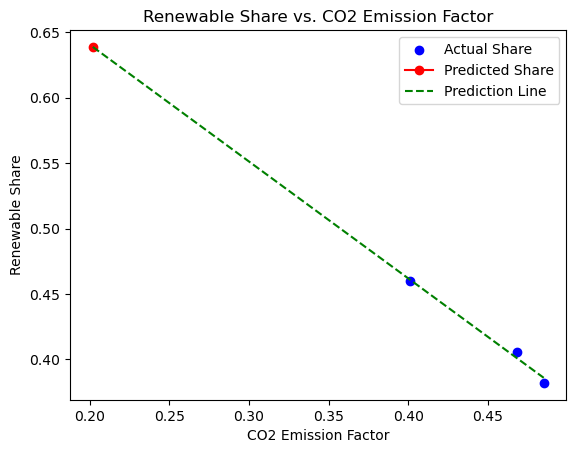

In [181]:
# Plot data and prediction line
plt.scatter(X, y, color="blue", label="Actual Share")

# Predicted point (0.202, predicted_share)
plt.plot([0.202], [predicted_share], marker="o", color="red", label="Predicted Share")

# Create a line representing the model's prediction across the entire range of CO2 emission factors
X_line = np.linspace(0.202, max(X), 100)  # Start from the predicted point's x-coordinate
y_line = model.predict(X_line.reshape(-1, 1))  # Predict renewable share for each point
plt.plot(X_line, y_line, color="green", linestyle="--", label="Prediction Line")

# Add labels and title
plt.xlabel("CO2 Emission Factor")
plt.ylabel("Renewables Share")
plt.title("Renewables Share vs. CO2 Emission Factor")

# Add legend
plt.legend()

# Show the plot
plt.show()